In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [70]:
from sklearn import cluster

In [4]:
Amos_1 = "The words of Amos, who was among the herdsmen of Tekoa, which he saw concerning Israel in the days of Uzziah king of Judah, and in the days of Jeroboam the son of Joash king of Israel, two years before the earthquake.And he said, The LORD will roar from Zion, and utter his voice from Jerusalem; and the habitations of the shepherds shall mourn, and the top of Carmel shall wither.Thus said the LORD; For three transgressions of Damascus, and for four, I will not turn away the punishment thereof; because they have threshed Gilead with threshing instruments of iron:But I will send a fire into the house of Hazael, which shall devour the palaces of Benhadad.I will break also the bar of Damascus, and cut off the inhabitant from the plain of Aven, and him that holds the scepter from the house of Eden: and the people of Syria shall go into captivity to Kir, said the LORD.Thus said the LORD; For three transgressions of Gaza, and for four, I will not turn away the punishment thereof; because they carried away captive the whole captivity, to deliver them up to Edom:But I will send a fire on the wall of Gaza, which shall devour the palaces thereof:And I will cut off the inhabitant from Ashdod, and him that holds the scepter from Ashkelon, and I will turn my hand against Ekron: and the remnant of the Philistines shall perish, said the Lord GOD.Thus said the LORD; For three transgressions of Tyrus, and for four, I will not turn away the punishment thereof; because they delivered up the whole captivity to Edom, and remembered not the brotherly covenant:But I will send a fire on the wall of Tyrus, which shall devour the palaces thereof.Thus said the LORD; For three transgressions of Edom, and for four, I will not turn away the punishment thereof; because he did pursue his brother with the sword, and did cast off all pity, and his anger did tear perpetually, and he kept his wrath for ever:But I will send a fire on Teman, which shall devour the palaces of Bozrah.Thus said the LORD; For three transgressions of the children of Ammon, and for four, I will not turn away the punishment thereof; because they have ripped up the women with child of Gilead, that they might enlarge their border:But I will kindle a fire in the wall of Rabbah, and it shall devour the palaces thereof, with shouting in the day of battle, with a tempest in the day of the whirlwind:And their king shall go into captivity, he and his princes together, said the LORD.".lower()

In [5]:
Amos_2 = "Thus said the LORD; For three transgressions of Moab, and for four, I will not turn away the punishment thereof; because he burned the bones of the king of Edom into lime:But I will send a fire on Moab, and it shall devour the palaces of Kirioth: and Moab shall die with tumult, with shouting, and with the sound of the trumpet:And I will cut off the judge from the middle thereof, and will slay all the princes thereof with him, said the LORD.Thus said the LORD; For three transgressions of Judah, and for four, I will not turn away the punishment thereof; because they have despised the law of the LORD, and have not kept his commandments, and their lies caused them to err, after the which their fathers have walked:But I will send a fire on Judah, and it shall devour the palaces of Jerusalem.Thus said the LORD; For three transgressions of Israel, and for four, I will not turn away the punishment thereof; because they sold the righteous for silver, and the poor for a pair of shoes;That pant after the dust of the earth on the head of the poor, and turn aside the way of the meek: and a man and his father will go in to the same maid, to profane my holy name:And they lay themselves down on clothes laid to pledge by every altar, and they drink the wine of the condemned in the house of their god.Yet destroyed I the Amorite before them, whose height was like the height of the cedars, and he was strong as the oaks; yet I destroyed his fruit from above, and his roots from beneath.Also I brought you up from the land of Egypt, and led you forty years through the wilderness, to possess the land of the Amorite.And I raised up of your sons for prophets, and of your young men for Nazarites. Is it not even thus, O you children of Israel? said the LORD.But you gave the Nazarites wine to drink; and commanded the prophets, saying, Prophesy not.Behold, I am pressed under you, as a cart is pressed that is full of sheaves.Therefore the flight shall perish from the swift, and the strong shall not strengthen his force, neither shall the mighty deliver himself:Neither shall he stand that handles the bow; and he that is swift of foot shall not deliver himself: neither shall he that rides the horse deliver himself.And he that is courageous among the mighty shall flee away naked in that day, said the LORD.".lower()

In [6]:
Amos_3 = "Hear this word that the LORD has spoken against you, O children of Israel, against the whole family which I brought up from the land of Egypt, saying,You only have I known of all the families of the earth: therefore I will punish you for all your iniquities.Can two walk together, except they be agreed?Will a lion roar in the forest, when he has no prey? will a young lion cry out of his den, if he have taken nothing?Can a bird fall in a snare on the earth, where no gin is for him? shall one take up a snare from the earth, and have taken nothing at all?Shall a trumpet be blown in the city, and the people not be afraid? shall there be evil in a city, and the LORD has not done it?Surely the Lord GOD will do nothing, but he reveals his secret to his servants the prophets.The lion has roared, who will not fear? the Lord GOD has spoken, who can but prophesy?Publish in the palaces at Ashdod, and in the palaces in the land of Egypt, and say, Assemble yourselves on the mountains of Samaria, and behold the great tumults in the middle thereof, and the oppressed in the middle thereof.For they know not to do right, said the LORD, who store up violence and robbery in their palaces.Therefore thus said the Lord GOD; An adversary there shall be even round about the land; and he shall bring down your strength from you, and your palaces shall be spoiled.Thus said the LORD; As the shepherd takes out of the mouth of the lion two legs, or a piece of an ear; so shall the children of Israel be taken out that dwell in Samaria in the corner of a bed, and in Damascus in a couch.Hear you, and testify in the house of Jacob, said the Lord GOD, the God of hosts,That in the day that I shall visit the transgressions of Israel on him I will also visit the altars of Bethel: and the horns of the altar shall be cut off, and fall to the ground.And I will smite the winter house with the summer house; and the houses of ivory shall perish, and the great houses shall have an end, said the LORD.".lower()

In [8]:
Amos_4 = "Hear this word, you cows of Bashan, that are in the mountain of Samaria, which oppress the poor, which crush the needy, which say to their masters, Bring, and let us drink.The Lord GOD has sworn by his holiness, that, see, the days shall come on you, that he will take you away with hooks, and your posterity with fishhooks.And you shall go out at the breaches, every cow at that which is before her; and you shall cast them into the palace, said the LORD.Come to Bethel, and transgress; at Gilgal multiply transgression; and bring your sacrifices every morning, and your tithes after three years:And offer a sacrifice of thanksgiving with leaven, and proclaim and publish the free offerings: for this likes you, O you children of Israel, said the Lord GOD.And I also have given you cleanness of teeth in all your cities, and want of bread in all your places: yet have you not returned to me, said the LORD.And also I have withheld the rain from you, when there were yet three months to the harvest: and I caused it to rain on one city, and caused it not to rain on another city: one piece was rained on, and the piece whereupon it rained not withered.So two or three cities wandered to one city, to drink water; but they were not satisfied: yet have you not returned to me, said the LORD.I have smitten you with blasting and mildew: when your gardens and your vineyards and your fig trees and your olive trees increased, the palmerworm devoured them: yet have you not returned to me, said the LORD.I have sent among you the pestilence after the manner of Egypt: your young men have I slain with the sword, and have taken away your horses; and I have made the stink of your camps to come up to your nostrils: yet have you not returned to me, said the LORD.I have overthrown some of you, as God overthrew Sodom and Gomorrah, and you were as a firebrand plucked out of the burning: yet have you not returned to me, said the LORD.Therefore thus will I do to you, O Israel: and because I will do this to you, prepare to meet your God, O Israel.For, see, he that forms the mountains, and creates the wind, and declares to man what is his thought, that makes the morning darkness, and treads on the high places of the earth, The LORD, The God of hosts, is his name.".lower()

In [9]:
Amos_5 = "Hear you this word which I take up against you, even a lamentation, O house of Israel.The virgin of Israel is fallen; she shall no more rise: she is forsaken on her land; there is none to raise her up.For thus said the Lord GOD; The city that went out by a thousand shall leave an hundred, and that which went forth by an hundred shall leave ten, to the house of Israel.For thus said the LORD to the house of Israel, Seek you me, and you shall live:But seek not Bethel, nor enter into Gilgal, and pass not to Beersheba: for Gilgal shall surely go into captivity, and Bethel shall come to nothing.Seek the LORD, and you shall live; lest he break out like fire in the house of Joseph, and devour it, and there be none to quench it in Bethel.You who turn judgment to wormwood, and leave off righteousness in the earth,Seek him that makes the seven stars and Orion, and turns the shadow of death into the morning, and makes the day dark with night: that calls for the waters of the sea, and pours them out on the face of the earth: The LORD is his name:That strengthens the spoiled against the strong, so that the spoiled shall come against the fortress.They hate him that rebukes in the gate, and they abhor him that speaks uprightly.For as much therefore as your treading is on the poor, and you take from him burdens of wheat: you have built houses of hewn stone, but you shall not dwell in them; you have planted pleasant vineyards, but you shall not drink wine of them.For I know your manifold transgressions and your mighty sins: they afflict the just, they take a bribe, and they turn aside the poor in the gate from their right.Therefore the prudent shall keep silence in that time; for it is an evil time.Seek good, and not evil, that you may live: and so the LORD, the God of hosts, shall be with you, as you have spoken.Hate the evil, and love the good, and establish judgment in the gate: it may be that the LORD God of hosts will be gracious to the remnant of Joseph.Therefore the LORD, the God of hosts, the LORD, said thus; Wailing shall be in all streets; and they shall say in all the highways, Alas! alas! and they shall call the farmer to mourning, and such as are skillful of lamentation to wailing.And in all vineyards shall be wailing: for I will pass through you, said the LORD.Woe to you that desire the day of the LORD! to what end is it for you? the day of the LORD is darkness, and not light.As if a man did flee from a lion, and a bear met him; or went into the house, and leaned his hand on the wall, and a serpent bit him.Shall not the day of the LORD be darkness, and not light? even very dark, and no brightness in it?I hate, I despise your feast days, and I will not smell in your solemn assemblies.Though you offer me burnt offerings and your meat offerings, I will not accept them: neither will I regard the peace offerings of your fat beasts.Take you away from me the noise of your songs; for I will not hear the melody of your viols.But let judgment run down as waters, and righteousness as a mighty stream.Have you offered to me sacrifices and offerings in the wilderness forty years, O house of Israel?But you have borne the tabernacle of your Moloch and Chiun your images, the star of your god, which you made to yourselves.Therefore will I cause you to go into captivity beyond Damascus, said the LORD, whose name is The God of hosts.".lower()

In [10]:
Amos_6 = "Woe to them that are at ease in Zion, and trust in the mountain of Samaria, which are named chief of the nations, to whom the house of Israel came!Pass you to Calneh, and see; and from there go you to Hamath the great: then go down to Gath of the Philistines: be they better than these kingdoms? or their border greater than your border?You that put far away the evil day, and cause the seat of violence to come near;That lie on beds of ivory, and stretch themselves on their couches, and eat the lambs out of the flock, and the calves out of the middle of the stall;That chant to the sound of the viol, and invent to themselves instruments of music, like David;That drink wine in bowls, and anoint themselves with the chief ointments: but they are not grieved for the affliction of Joseph.Therefore now shall they go captive with the first that go captive, and the banquet of them that stretched themselves shall be removed.The Lord GOD has sworn by himself, said the LORD the God of hosts, I abhor the excellency of Jacob, and hate his palaces: therefore will I deliver up the city with all that is therein.And it shall come to pass, if there remain ten men in one house, that they shall die.And a man' uncle shall take him up, and he that burns him, to bring out the bones out of the house, and shall say to him that is by the sides of the house, Is there yet any with you? and he shall say, No. Then shall he say, Hold your tongue: for we may not make mention of the name of the LORD.For, behold, the LORD commands, and he will smite the great house with breaches, and the little house with clefts.Shall horses run on the rock? will one plow there with oxen? for you have turned judgment into gall, and the fruit of righteousness into hemlock:You which rejoice in a thing of nothing, which say, Have we not taken to us horns by our own strength?But, behold, I will raise up against you a nation, O house of Israel, said the LORD the God of hosts; and they shall afflict you from the entering in of Hemath to the river of the wilderness.".lower()

In [11]:
Amos_7 = "Thus has the Lord GOD showed to me; and, behold, he formed grasshoppers in the beginning of the shooting up of the latter growth; and, see, it was the latter growth after the king' mowings.And it came to pass, that when they had made an end of eating the grass of the land, then I said, O Lord GOD, forgive, I beseech you: by whom shall Jacob arise? for he is small.The LORD repented for this: It shall not be, said the LORD.Thus has the Lord GOD showed to me: and, behold, the Lord GOD called to contend by fire, and it devoured the great deep, and did eat up a part.Then said I, O Lord GOD, cease, I beseech you: by whom shall Jacob arise? for he is small.The LORD repented for this: This also shall not be, said the Lord GOD.Thus he showed me: and, behold, the LORD stood on a wall made by a plumb line, with a plumb line in his hand.And the LORD said to me, Amos, what see you? And I said, A plumb line. Then said the LORD, Behold, I will set a plumb line in the middle of my people Israel: I will not again pass by them any more:And the high places of Isaac shall be desolate, and the sanctuaries of Israel shall be laid waste; and I will rise against the house of Jeroboam with the sword.Then Amaziah the priest of Bethel sent to Jeroboam king of Israel, saying, Amos has conspired against you in the middle of the house of Israel: the land is not able to bear all his words.For thus Amos said, Jeroboam shall die by the sword, and Israel shall surely be led away captive out of their own land.Also Amaziah said to Amos, O you seer, go, flee you away into the land of Judah, and there eat bread, and prophesy there:But prophesy not again any more at Bethel: for it is the king' chapel, and it is the king' court.Then answered Amos, and said to Amaziah, I was no prophet, neither was I a prophet' son; but I was an herdsman, and a gatherer of sycomore fruit:And the LORD took me as I followed the flock, and the LORD said to me, Go, prophesy to my people Israel.Now therefore hear you the word of the LORD: You say, Prophesy not against Israel, and drop not your word against the house of Isaac.Therefore thus said the LORD; Your wife shall be an harlot in the city, and your sons and your daughters shall fall by the sword, and your land shall be divided by line; and you shall die in a polluted land: and Israel shall surely go into captivity forth of his land.".lower()

In [12]:
Amos_8 = "Thus has the Lord GOD showed to me: and behold a basket of summer fruit.And he said, Amos, what see you? And I said, A basket of summer fruit. Then said the LORD to me, The end is come on my people of Israel; I will not again pass by them any more.And the songs of the temple shall be howlings in that day, said the Lord GOD: there shall be many dead bodies in every place; they shall cast them forth with silence.Hear this, O you that swallow up the needy, even to make the poor of the land to fail,Saying, When will the new moon be gone, that we may sell corn? and the sabbath, that we may set forth wheat, making the ephah small, and the shekel great, and falsifying the balances by deceit?That we may buy the poor for silver, and the needy for a pair of shoes; yes, and sell the refuse of the wheat?The LORD has sworn by the excellency of Jacob, Surely I will never forget any of their works.Shall not the land tremble for this, and every one mourn that dwells therein? and it shall rise up wholly as a flood; and it shall be cast out and drowned, as by the flood of Egypt.And it shall come to pass in that day, said the Lord GOD, that I will cause the sun to go down at noon, and I will darken the earth in the clear day:And I will turn your feasts into mourning, and all your songs into lamentation; and I will bring up sackcloth on all loins, and baldness on every head; and I will make it as the mourning of an only son, and the end thereof as a bitter day.Behold, the days come, said the Lord GOD, that I will send a famine in the land, not a famine of bread, nor a thirst for water, but of hearing the words of the LORD:And they shall wander from sea to sea, and from the north even to the east, they shall run to and fro to seek the word of the LORD, and shall not find it.In that day shall the fair virgins and young men faint for thirst.They that swear by the sin of Samaria, and say, Your god, O Dan, lives; and, The manner of Beersheba lives; even they shall fall, and never rise up again.".lower()

In [13]:
Amos_9 = "I saw the LORD standing on the altar: and he said, Smite the lintel of the door, that the posts may shake: and cut them in the head, all of them; and I will slay the last of them with the sword: he that flees of them shall not flee away, and he that escapes of them shall not be delivered.Though they dig into hell, there shall my hand take them; though they climb up to heaven, there will I bring them down:And though they hide themselves in the top of Carmel, I will search and take them out there; and though they be hid from my sight in the bottom of the sea, there will I command the serpent, and he shall bite them:And though they go into captivity before their enemies, there will I command the sword, and it shall slay them: and I will set my eyes on them for evil, and not for good.And the Lord GOD of hosts is he that touches the land, and it shall melt, and all that dwell therein shall mourn: and it shall rise up wholly like a flood; and shall be drowned, as by the flood of Egypt.It is he that builds his stories in the heaven, and has founded his troop in the earth; he that calls for the waters of the sea, and pours them out on the face of the earth: The LORD is his name.Are you not as children of the Ethiopians to me, O children of Israel? said the LORD. Have not I brought up Israel out of the land of Egypt? and the Philistines from Caphtor, and the Syrians from Kir?Behold, the eyes of the Lord GOD are on the sinful kingdom, and I will destroy it from off the face of the earth; saving that I will not utterly destroy the house of Jacob, said the LORD.For, see, I will command, and I will sift the house of Israel among all nations, like as corn is sifted in a sieve, yet shall not the least grain fall on the earth.All the sinners of my people shall die by the sword, which say, The evil shall not overtake nor prevent us.In that day will I raise up the tabernacle of David that is fallen, and close up the breaches thereof; and I will raise up his ruins, and I will build it as in the days of old:That they may possess the remnant of Edom, and of all the heathen, which are called by my name, said the LORD that does this.Behold, the days come, said the LORD, that the plowman shall overtake the reaper, and the treader of grapes him that sows seed; and the mountains shall drop sweet wine, and all the hills shall melt.And I will bring again the captivity of my people of Israel, and they shall build the waste cities, and inhabit them; and they shall plant vineyards, and drink the wine thereof; they shall also make gardens, and eat the fruit of them.And I will plant them on their land, and they shall no more be pulled up out of their land which I have given them, said the LORD your God.".lower()

In [57]:
tokens = nltk.word_tokenize(Amos_9)

In [58]:
stop_words = set(stopwords.words('english'))

In [59]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [60]:
print(filtered_sentence1)

['saw', 'lord', 'standing', 'altar', ':', 'said', ',', 'smite', 'lintel', 'door', ',', 'posts', 'may', 'shake', ':', 'cut', 'head', ',', ';', 'slay', 'last', 'sword', ':', 'flees', 'shall', 'flee', 'away', ',', 'escapes', 'shall', 'delivered.though', 'dig', 'hell', ',', 'shall', 'hand', 'take', ';', 'though', 'climb', 'heaven', ',', 'bring', ':', 'though', 'hide', 'top', 'carmel', ',', 'search', 'take', ';', 'though', 'hid', 'sight', 'bottom', 'sea', ',', 'command', 'serpent', ',', 'shall', 'bite', ':', 'though', 'go', 'captivity', 'enemies', ',', 'command', 'sword', ',', 'shall', 'slay', ':', 'set', 'eyes', 'evil', ',', 'good.and', 'lord', 'god', 'hosts', 'touches', 'land', ',', 'shall', 'melt', ',', 'dwell', 'therein', 'shall', 'mourn', ':', 'shall', 'rise', 'wholly', 'like', 'flood', ';', 'shall', 'drowned', ',', 'flood', 'egypt.it', 'builds', 'stories', 'heaven', ',', 'founded', 'troop', 'earth', ';', 'calls', 'waters', 'sea', ',', 'pours', 'face', 'earth', ':', 'lord', 'name.are',

In [61]:
data =np.array([["Amos_1", "'words', 'amos', ',', 'among', 'herdsmen', 'tekoa', ',', 'saw', 'concerning', 'israel', 'days', 'uzziah', 'king', 'judah', ',', 'days', 'jeroboam', 'son', 'joash', 'king', 'israel', ',', 'two', 'years', 'earthquake.and', 'said', ',', 'lord', 'roar', 'zion', ',', 'utter', 'voice', 'jerusalem', ';', 'habitations', 'shepherds', 'shall', 'mourn', ',', 'top', 'carmel', 'shall', 'wither.thus', 'said', 'lord', ';', 'three', 'transgressions', 'damascus', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'threshed', 'gilead', 'threshing', 'instruments', 'iron', ':', 'send', 'fire', 'house', 'hazael', ',', 'shall', 'devour', 'palaces', 'benhadad.i', 'break', 'also', 'bar', 'damascus', ',', 'cut', 'inhabitant', 'plain', 'aven', ',', 'holds', 'scepter', 'house', 'eden', ':', 'people', 'syria', 'shall', 'go', 'captivity', 'kir', ',', 'said', 'lord.thus', 'said', 'lord', ';', 'three', 'transgressions', 'gaza', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'carried', 'away', 'captive', 'whole', 'captivity', ',', 'deliver', 'edom', ':', 'send', 'fire', 'wall', 'gaza', ',', 'shall', 'devour', 'palaces', 'thereof', ':', 'cut', 'inhabitant', 'ashdod', ',', 'holds', 'scepter', 'ashkelon', ',', 'turn', 'hand', 'ekron', ':', 'remnant', 'philistines', 'shall', 'perish', ',', 'said', 'lord', 'god.thus', 'said', 'lord', ';', 'three', 'transgressions', 'tyrus', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'delivered', 'whole', 'captivity', 'edom', ',', 'remembered', 'brotherly', 'covenant', ':', 'send', 'fire', 'wall', 'tyrus', ',', 'shall', 'devour', 'palaces', 'thereof.thus', 'said', 'lord', ';', 'three', 'transgressions', 'edom', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'pursue', 'brother', 'sword', ',', 'cast', 'pity', ',', 'anger', 'tear', 'perpetually', ',', 'kept', 'wrath', 'ever', ':', 'send', 'fire', 'teman', ',', 'shall', 'devour', 'palaces', 'bozrah.thus', 'said', 'lord', ';', 'three', 'transgressions', 'children', 'ammon', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'ripped', 'women', 'child', 'gilead', ',', 'might', 'enlarge', 'border', ':', 'kindle', 'fire', 'wall', 'rabbah', ',', 'shall', 'devour', 'palaces', 'thereof', ',', 'shouting', 'day', 'battle', ',', 'tempest', 'day', 'whirlwind', ':', 'king', 'shall', 'go', 'captivity', ',', 'princes', 'together', ',', 'said', 'lord', '.'"],
               ["Amos_2", "'thus', 'said', 'lord', ';', 'three', 'transgressions', 'moab', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'burned', 'bones', 'king', 'edom', 'lime', ':', 'send', 'fire', 'moab', ',', 'shall', 'devour', 'palaces', 'kirioth', ':', 'moab', 'shall', 'die', 'tumult', ',', 'shouting', ',', 'sound', 'trumpet', ':', 'cut', 'judge', 'middle', 'thereof', ',', 'slay', 'princes', 'thereof', ',', 'said', 'lord.thus', 'said', 'lord', ';', 'three', 'transgressions', 'judah', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'despised', 'law', 'lord', ',', 'kept', 'commandments', ',', 'lies', 'caused', 'err', ',', 'fathers', 'walked', ':', 'send', 'fire', 'judah', ',', 'shall', 'devour', 'palaces', 'jerusalem.thus', 'said', 'lord', ';', 'three', 'transgressions', 'israel', ',', 'four', ',', 'turn', 'away', 'punishment', 'thereof', ';', 'sold', 'righteous', 'silver', ',', 'poor', 'pair', 'shoes', ';', 'pant', 'dust', 'earth', 'head', 'poor', ',', 'turn', 'aside', 'way', 'meek', ':', 'man', 'father', 'go', 'maid', ',', 'profane', 'holy', 'name', ':', 'lay', 'clothes', 'laid', 'pledge', 'every', 'altar', ',', 'drink', 'wine', 'condemned', 'house', 'god.yet', 'destroyed', 'amorite', ',', 'whose', 'height', 'like', 'height', 'cedars', ',', 'strong', 'oaks', ';', 'yet', 'destroyed', 'fruit', ',', 'roots', 'beneath.also', 'brought', 'land', 'egypt', ',', 'led', 'forty', 'years', 'wilderness', ',', 'possess', 'land', 'amorite.and', 'raised', 'sons', 'prophets', ',', 'young', 'men', 'nazarites', '.', 'even', 'thus', ',', 'children', 'israel', '?', 'said', 'lord.but', 'gave', 'nazarites', 'wine', 'drink', ';', 'commanded', 'prophets', ',', 'saying', ',', 'prophesy', 'not.behold', ',', 'pressed', ',', 'cart', 'pressed', 'full', 'sheaves.therefore', 'flight', 'shall', 'perish', 'swift', ',', 'strong', 'shall', 'strengthen', 'force', ',', 'neither', 'shall', 'mighty', 'deliver', ':', 'neither', 'shall', 'stand', 'handles', 'bow', ';', 'swift', 'foot', 'shall', 'deliver', ':', 'neither', 'shall', 'rides', 'horse', 'deliver', 'himself.and', 'courageous', 'among', 'mighty', 'shall', 'flee', 'away', 'naked', 'day', ',', 'said', 'lord', '.'"],
               ["Amos_3", "'hear', 'word', 'lord', 'spoken', ',', 'children', 'israel', ',', 'whole', 'family', 'brought', 'land', 'egypt', ',', 'saying', ',', 'known', 'families', 'earth', ':', 'therefore', 'punish', 'iniquities.can', 'two', 'walk', 'together', ',', 'except', 'agreed', '?', 'lion', 'roar', 'forest', ',', 'prey', '?', 'young', 'lion', 'cry', 'den', ',', 'taken', 'nothing', '?', 'bird', 'fall', 'snare', 'earth', ',', 'gin', '?', 'shall', 'one', 'take', 'snare', 'earth', ',', 'taken', 'nothing', '?', 'shall', 'trumpet', 'blown', 'city', ',', 'people', 'afraid', '?', 'shall', 'evil', 'city', ',', 'lord', 'done', '?', 'surely', 'lord', 'god', 'nothing', ',', 'reveals', 'secret', 'servants', 'prophets.the', 'lion', 'roared', ',', 'fear', '?', 'lord', 'god', 'spoken', ',', 'prophesy', '?', 'publish', 'palaces', 'ashdod', ',', 'palaces', 'land', 'egypt', ',', 'say', ',', 'assemble', 'mountains', 'samaria', ',', 'behold', 'great', 'tumults', 'middle', 'thereof', ',', 'oppressed', 'middle', 'thereof.for', 'know', 'right', ',', 'said', 'lord', ',', 'store', 'violence', 'robbery', 'palaces.therefore', 'thus', 'said', 'lord', 'god', ';', 'adversary', 'shall', 'even', 'round', 'land', ';', 'shall', 'bring', 'strength', ',', 'palaces', 'shall', 'spoiled.thus', 'said', 'lord', ';', 'shepherd', 'takes', 'mouth', 'lion', 'two', 'legs', ',', 'piece', 'ear', ';', 'shall', 'children', 'israel', 'taken', 'dwell', 'samaria', 'corner', 'bed', ',', 'damascus', 'couch.hear', ',', 'testify', 'house', 'jacob', ',', 'said', 'lord', 'god', ',', 'god', 'hosts', ',', 'day', 'shall', 'visit', 'transgressions', 'israel', 'also', 'visit', 'altars', 'bethel', ':', 'horns', 'altar', 'shall', 'cut', ',', 'fall', 'ground.and', 'smite', 'winter', 'house', 'summer', 'house', ';', 'houses', 'ivory', 'shall', 'perish', ',', 'great', 'houses', 'shall', 'end', ',', 'said', 'lord', '.'"],
               ["Amos_4", "'hear', 'word', ',', 'cows', 'bashan', ',', 'mountain', 'samaria', ',', 'oppress', 'poor', ',', 'crush', 'needy', ',', 'say', 'masters', ',', 'bring', ',', 'let', 'us', 'drink.the', 'lord', 'god', 'sworn', 'holiness', ',', ',', 'see', ',', 'days', 'shall', 'come', ',', 'take', 'away', 'hooks', ',', 'posterity', 'fishhooks.and', 'shall', 'go', 'breaches', ',', 'every', 'cow', ';', 'shall', 'cast', 'palace', ',', 'said', 'lord.come', 'bethel', ',', 'transgress', ';', 'gilgal', 'multiply', 'transgression', ';', 'bring', 'sacrifices', 'every', 'morning', ',', 'tithes', 'three', 'years', ':', 'offer', 'sacrifice', 'thanksgiving', 'leaven', ',', 'proclaim', 'publish', 'free', 'offerings', ':', 'likes', ',', 'children', 'israel', ',', 'said', 'lord', 'god.and', 'also', 'given', 'cleanness', 'teeth', 'cities', ',', 'want', 'bread', 'places', ':', 'yet', 'returned', ',', 'said', 'lord.and', 'also', 'withheld', 'rain', ',', 'yet', 'three', 'months', 'harvest', ':', 'caused', 'rain', 'one', 'city', ',', 'caused', 'rain', 'another', 'city', ':', 'one', 'piece', 'rained', ',', 'piece', 'whereupon', 'rained', 'withered.so', 'two', 'three', 'cities', 'wandered', 'one', 'city', ',', 'drink', 'water', ';', 'satisfied', ':', 'yet', 'returned', ',', 'said', 'lord.i', 'smitten', 'blasting', 'mildew', ':', 'gardens', 'vineyards', 'fig', 'trees', 'olive', 'trees', 'increased', ',', 'palmerworm', 'devoured', ':', 'yet', 'returned', ',', 'said', 'lord.i', 'sent', 'among', 'pestilence', 'manner', 'egypt', ':', 'young', 'men', 'slain', 'sword', ',', 'taken', 'away', 'horses', ';', 'made', 'stink', 'camps', 'come', 'nostrils', ':', 'yet', 'returned', ',', 'said', 'lord.i', 'overthrown', ',', 'god', 'overthrew', 'sodom', 'gomorrah', ',', 'firebrand', 'plucked', 'burning', ':', 'yet', 'returned', ',', 'said', 'lord.therefore', 'thus', ',', 'israel', ':', ',', 'prepare', 'meet', 'god', ',', 'israel.for', ',', 'see', ',', 'forms', 'mountains', ',', 'creates', 'wind', ',', 'declares', 'man', 'thought', ',', 'makes', 'morning', 'darkness', ',', 'treads', 'high', 'places', 'earth', ',', 'lord', ',', 'god', 'hosts', ',', 'name', '.'"],
               ["Amos_5", "'hear', 'word', 'take', ',', 'even', 'lamentation', ',', 'house', 'israel.the', 'virgin', 'israel', 'fallen', ';', 'shall', 'rise', ':', 'forsaken', 'land', ';', 'none', 'raise', 'up.for', 'thus', 'said', 'lord', 'god', ';', 'city', 'went', 'thousand', 'shall', 'leave', 'hundred', ',', 'went', 'forth', 'hundred', 'shall', 'leave', 'ten', ',', 'house', 'israel.for', 'thus', 'said', 'lord', 'house', 'israel', ',', 'seek', ',', 'shall', 'live', ':', 'seek', 'bethel', ',', 'enter', 'gilgal', ',', 'pass', 'beersheba', ':', 'gilgal', 'shall', 'surely', 'go', 'captivity', ',', 'bethel', 'shall', 'come', 'nothing.seek', 'lord', ',', 'shall', 'live', ';', 'lest', 'break', 'like', 'fire', 'house', 'joseph', ',', 'devour', ',', 'none', 'quench', 'bethel.you', 'turn', 'judgment', 'wormwood', ',', 'leave', 'righteousness', 'earth', ',', 'seek', 'makes', 'seven', 'stars', 'orion', ',', 'turns', 'shadow', 'death', 'morning', ',', 'makes', 'day', 'dark', 'night', ':', 'calls', 'waters', 'sea', ',', 'pours', 'face', 'earth', ':', 'lord', 'name', ':', 'strengthens', 'spoiled', 'strong', ',', 'spoiled', 'shall', 'come', 'fortress.they', 'hate', 'rebukes', 'gate', ',', 'abhor', 'speaks', 'uprightly.for', 'much', 'therefore', 'treading', 'poor', ',', 'take', 'burdens', 'wheat', ':', 'built', 'houses', 'hewn', 'stone', ',', 'shall', 'dwell', ';', 'planted', 'pleasant', 'vineyards', ',', 'shall', 'drink', 'wine', 'them.for', 'know', 'manifold', 'transgressions', 'mighty', 'sins', ':', 'afflict', ',', 'take', 'bribe', ',', 'turn', 'aside', 'poor', 'gate', 'right.therefore', 'prudent', 'shall', 'keep', 'silence', 'time', ';', 'evil', 'time.seek', 'good', ',', 'evil', ',', 'may', 'live', ':', 'lord', ',', 'god', 'hosts', ',', 'shall', ',', 'spoken.hate', 'evil', ',', 'love', 'good', ',', 'establish', 'judgment', 'gate', ':', 'may', 'lord', 'god', 'hosts', 'gracious', 'remnant', 'joseph.therefore', 'lord', ',', 'god', 'hosts', ',', 'lord', ',', 'said', 'thus', ';', 'wailing', 'shall', 'streets', ';', 'shall', 'say', 'highways', ',', 'alas', '!', 'alas', '!', 'shall', 'call', 'farmer', 'mourning', ',', 'skillful', 'lamentation', 'wailing.and', 'vineyards', 'shall', 'wailing', ':', 'pass', ',', 'said', 'lord.woe', 'desire', 'day', 'lord', '!', 'end', '?', 'day', 'lord', 'darkness', ',', 'light.as', 'man', 'flee', 'lion', ',', 'bear', 'met', ';', 'went', 'house', ',', 'leaned', 'hand', 'wall', ',', 'serpent', 'bit', 'him.shall', 'day', 'lord', 'darkness', ',', 'light', '?', 'even', 'dark', ',', 'brightness', '?', 'hate', ',', 'despise', 'feast', 'days', ',', 'smell', 'solemn', 'assemblies.though', 'offer', 'burnt', 'offerings', 'meat', 'offerings', ',', 'accept', ':', 'neither', 'regard', 'peace', 'offerings', 'fat', 'beasts.take', 'away', 'noise', 'songs', ';', 'hear', 'melody', 'viols.but', 'let', 'judgment', 'run', 'waters', ',', 'righteousness', 'mighty', 'stream.have', 'offered', 'sacrifices', 'offerings', 'wilderness', 'forty', 'years', ',', 'house', 'israel', '?', 'borne', 'tabernacle', 'moloch', 'chiun', 'images', ',', 'star', 'god', ',', 'made', 'yourselves.therefore', 'cause', 'go', 'captivity', 'beyond', 'damascus', ',', 'said', 'lord', ',', 'whose', 'name', 'god', 'hosts', '.'"],
               ["Amos_6", "'woe', 'ease', 'zion', ',', 'trust', 'mountain', 'samaria', ',', 'named', 'chief', 'nations', ',', 'house', 'israel', 'came', '!', 'pass', 'calneh', ',', 'see', ';', 'go', 'hamath', 'great', ':', 'go', 'gath', 'philistines', ':', 'better', 'kingdoms', '?', 'border', 'greater', 'border', '?', 'put', 'far', 'away', 'evil', 'day', ',', 'cause', 'seat', 'violence', 'come', 'near', ';', 'lie', 'beds', 'ivory', ',', 'stretch', 'couches', ',', 'eat', 'lambs', 'flock', ',', 'calves', 'middle', 'stall', ';', 'chant', 'sound', 'viol', ',', 'invent', 'instruments', 'music', ',', 'like', 'david', ';', 'drink', 'wine', 'bowls', ',', 'anoint', 'chief', 'ointments', ':', 'grieved', 'affliction', 'joseph.therefore', 'shall', 'go', 'captive', 'first', 'go', 'captive', ',', 'banquet', 'stretched', 'shall', 'removed.the', 'lord', 'god', 'sworn', ',', 'said', 'lord', 'god', 'hosts', ',', 'abhor', 'excellency', 'jacob', ',', 'hate', 'palaces', ':', 'therefore', 'deliver', 'city', 'therein.and', 'shall', 'come', 'pass', ',', 'remain', 'ten', 'men', 'one', 'house', ',', 'shall', 'die.and', 'man', ', 'uncle', 'shall', 'take', ',', 'burns', ',', 'bring', 'bones', 'house', ',', 'shall', 'say', 'sides', 'house', ',', 'yet', '?', 'shall', 'say', ',', '.', 'shall', 'say', ',', 'hold', 'tongue', ':', 'may', 'make', 'mention', 'name', 'lord.for', ',', 'behold', ',', 'lord', 'commands', ',', 'smite', 'great', 'house', 'breaches', ',', 'little', 'house', 'clefts.shall', 'horses', 'run', 'rock', '?', 'one', 'plow', 'oxen', '?', 'turned', 'judgment', 'gall', ',', 'fruit', 'righteousness', 'hemlock', ':', 'rejoice', 'thing', 'nothing', ',', 'say', ',', 'taken', 'us', 'horns', 'strength', '?', ',', 'behold', ',', 'raise', 'nation', ',', 'house', 'israel', ',', 'said', 'lord', 'god', 'hosts', ';', 'shall', 'afflict', 'entering', 'hemath', 'river', 'wilderness', '.'"],
               ["Amos_7", "'thus', 'lord', 'god', 'showed', ';', ',', 'behold', ',', 'formed', 'grasshoppers', 'beginning', 'shooting', 'latter', 'growth', ';', ',', 'see', ',', 'latter', 'growth', 'king', ', 'mowings.and', 'came', 'pass', ',', 'made', 'end', 'eating', 'grass', 'land', ',', 'said', ',', 'lord', 'god', ',', 'forgive', ',', 'beseech', ':', 'shall', 'jacob', 'arise', '?', 'small.the', 'lord', 'repented', ':', 'shall', ',', 'said', 'lord.thus', 'lord', 'god', 'showed', ':', ',', 'behold', ',', 'lord', 'god', 'called', 'contend', 'fire', ',', 'devoured', 'great', 'deep', ',', 'eat', 'part.then', 'said', ',', 'lord', 'god', ',', 'cease', ',', 'beseech', ':', 'shall', 'jacob', 'arise', '?', 'small.the', 'lord', 'repented', ':', 'also', 'shall', ',', 'said', 'lord', 'god.thus', 'showed', ':', ',', 'behold', ',', 'lord', 'stood', 'wall', 'made', 'plumb', 'line', ',', 'plumb', 'line', 'hand.and', 'lord', 'said', ',', 'amos', ',', 'see', '?', 'said', ',', 'plumb', 'line', '.', 'said', 'lord', ',', 'behold', ',', 'set', 'plumb', 'line', 'middle', 'people', 'israel', ':', 'pass', ':', 'high', 'places', 'isaac', 'shall', 'desolate', ',', 'sanctuaries', 'israel', 'shall', 'laid', 'waste', ';', 'rise', 'house', 'jeroboam', 'sword.then', 'amaziah', 'priest', 'bethel', 'sent', 'jeroboam', 'king', 'israel', ',', 'saying', ',', 'amos', 'conspired', 'middle', 'house', 'israel', ':', 'land', 'able', 'bear', 'words.for', 'thus', 'amos', 'said', ',', 'jeroboam', 'shall', 'die', 'sword', ',', 'israel', 'shall', 'surely', 'led', 'away', 'captive', 'land.also', 'amaziah', 'said', 'amos', ',', 'seer', ',', 'go', ',', 'flee', 'away', 'land', 'judah', ',', 'eat', 'bread', ',', 'prophesy', ':', 'prophesy', 'bethel', ':', 'king', ', 'chapel', ',', 'king', ', 'court.then', 'answered', 'amos', ',', 'said', 'amaziah', ',', 'prophet', ',', 'neither', 'prophet', ', 'son', ';', 'herdsman', ',', 'gatherer', 'sycomore', 'fruit', ':', 'lord', 'took', 'followed', 'flock', ',', 'lord', 'said', ',', 'go', ',', 'prophesy', 'people', 'israel.now', 'therefore', 'hear', 'word', 'lord', ':', 'say', ',', 'prophesy', 'israel', ',', 'drop', 'word', 'house', 'isaac.therefore', 'thus', 'said', 'lord', ';', 'wife', 'shall', 'harlot', 'city', ',', 'sons', 'daughters', 'shall', 'fall', 'sword', ',', 'land', 'shall', 'divided', 'line', ';', 'shall', 'die', 'polluted', 'land', ':', 'israel', 'shall', 'surely', 'go', 'captivity', 'forth', 'land', '.'"],
               ["Amos_8", "'thus', 'lord', 'god', 'showed', ':', 'behold', 'basket', 'summer', 'fruit.and', 'said', ',', 'amos', ',', 'see', '?', 'said', ',', 'basket', 'summer', 'fruit', '.', 'said', 'lord', ',', 'end', 'come', 'people', 'israel', ';', 'pass', 'more.and', 'songs', 'temple', 'shall', 'howlings', 'day', ',', 'said', 'lord', 'god', ':', 'shall', 'many', 'dead', 'bodies', 'every', 'place', ';', 'shall', 'cast', 'forth', 'silence.hear', ',', 'swallow', 'needy', ',', 'even', 'make', 'poor', 'land', 'fail', ',', 'saying', ',', 'new', 'moon', 'gone', ',', 'may', 'sell', 'corn', '?', 'sabbath', ',', 'may', 'set', 'forth', 'wheat', ',', 'making', 'ephah', 'small', ',', 'shekel', 'great', ',', 'falsifying', 'balances', 'deceit', '?', 'may', 'buy', 'poor', 'silver', ',', 'needy', 'pair', 'shoes', ';', 'yes', ',', 'sell', 'refuse', 'wheat', '?', 'lord', 'sworn', 'excellency', 'jacob', ',', 'surely', 'never', 'forget', 'works.shall', 'land', 'tremble', ',', 'every', 'one', 'mourn', 'dwells', 'therein', '?', 'shall', 'rise', 'wholly', 'flood', ';', 'shall', 'cast', 'drowned', ',', 'flood', 'egypt.and', 'shall', 'come', 'pass', 'day', ',', 'said', 'lord', 'god', ',', 'cause', 'sun', 'go', 'noon', ',', 'darken', 'earth', 'clear', 'day', ':', 'turn', 'feasts', 'mourning', ',', 'songs', 'lamentation', ';', 'bring', 'sackcloth', 'loins', ',', 'baldness', 'every', 'head', ';', 'make', 'mourning', 'son', ',', 'end', 'thereof', 'bitter', 'day.behold', ',', 'days', 'come', ',', 'said', 'lord', 'god', ',', 'send', 'famine', 'land', ',', 'famine', 'bread', ',', 'thirst', 'water', ',', 'hearing', 'words', 'lord', ':', 'shall', 'wander', 'sea', 'sea', ',', 'north', 'even', 'east', ',', 'shall', 'run', 'fro', 'seek', 'word', 'lord', ',', 'shall', 'find', 'it.in', 'day', 'shall', 'fair', 'virgins', 'young', 'men', 'faint', 'thirst.they', 'swear', 'sin', 'samaria', ',', 'say', ',', 'god', ',', 'dan', ',', 'lives', ';', ',', 'manner', 'beersheba', 'lives', ';', 'even', 'shall', 'fall', ',', 'never', 'rise', '.'"],
               ["Amos_9", "'saw', 'lord', 'standing', 'altar', ':', 'said', ',', 'smite', 'lintel', 'door', ',', 'posts', 'may', 'shake', ':', 'cut', 'head', ',', ';', 'slay', 'last', 'sword', ':', 'flees', 'shall', 'flee', 'away', ',', 'escapes', 'shall', 'delivered.though', 'dig', 'hell', ',', 'shall', 'hand', 'take', ';', 'though', 'climb', 'heaven', ',', 'bring', ':', 'though', 'hide', 'top', 'carmel', ',', 'search', 'take', ';', 'though', 'hid', 'sight', 'bottom', 'sea', ',', 'command', 'serpent', ',', 'shall', 'bite', ':', 'though', 'go', 'captivity', 'enemies', ',', 'command', 'sword', ',', 'shall', 'slay', ':', 'set', 'eyes', 'evil', ',', 'good.and', 'lord', 'god', 'hosts', 'touches', 'land', ',', 'shall', 'melt', ',', 'dwell', 'therein', 'shall', 'mourn', ':', 'shall', 'rise', 'wholly', 'like', 'flood', ';', 'shall', 'drowned', ',', 'flood', 'egypt.it', 'builds', 'stories', 'heaven', ',', 'founded', 'troop', 'earth', ';', 'calls', 'waters', 'sea', ',', 'pours', 'face', 'earth', ':', 'lord', 'name.are', 'children', 'ethiopians', ',', 'children', 'israel', '?', 'said', 'lord', '.', 'brought', 'israel', 'land', 'egypt', '?', 'philistines', 'caphtor', ',', 'syrians', 'kir', '?', 'behold', ',', 'eyes', 'lord', 'god', 'sinful', 'kingdom', ',', 'destroy', 'face', 'earth', ';', 'saving', 'utterly', 'destroy', 'house', 'jacob', ',', 'said', 'lord.for', ',', 'see', ',', 'command', ',', 'sift', 'house', 'israel', 'among', 'nations', ',', 'like', 'corn', 'sifted', 'sieve', ',', 'yet', 'shall', 'least', 'grain', 'fall', 'earth.all', 'sinners', 'people', 'shall', 'die', 'sword', ',', 'say', ',', 'evil', 'shall', 'overtake', 'prevent', 'us.in', 'day', 'raise', 'tabernacle', 'david', 'fallen', ',', 'close', 'breaches', 'thereof', ';', 'raise', 'ruins', ',', 'build', 'days', 'old', ':', 'may', 'possess', 'remnant', 'edom', ',', 'heathen', ',', 'called', 'name', ',', 'said', 'lord', 'this.behold', ',', 'days', 'come', ',', 'said', 'lord', ',', 'plowman', 'shall', 'overtake', 'reaper', ',', 'treader', 'grapes', 'sows', 'seed', ';', 'mountains', 'shall', 'drop', 'sweet', 'wine', ',', 'hills', 'shall', 'melt.and', 'bring', 'captivity', 'people', 'israel', ',', 'shall', 'build', 'waste', 'cities', ',', 'inhabit', ';', 'shall', 'plant', 'vineyards', ',', 'drink', 'wine', 'thereof', ';', 'shall', 'also', 'make', 'gardens', ',', 'eat', 'fruit', 'them.and', 'plant', 'land', ',', 'shall', 'pulled', 'land', 'given', ',', 'said', 'lord', 'god', '.'"]])

In [62]:
df = pd.DataFrame(data, index=range(100,109),columns=['Autor', 'Livro'])

In [63]:
print(df)

      Autor                                              Livro
100  Amos_1  'words', 'amos', ',', 'among', 'herdsmen', 'te...
101  Amos_2  'thus', 'said', 'lord', ';', 'three', 'transgr...
102  Amos_3  'hear', 'word', 'lord', 'spoken', ',', 'childr...
103  Amos_4  'hear', 'word', ',', 'cows', 'bashan', ',', 'm...
104  Amos_5  'hear', 'word', 'take', ',', 'even', 'lamentat...
105  Amos_6  'woe', 'ease', 'zion', ',', 'trust', 'mountain...
106  Amos_7  'thus', 'lord', 'god', 'showed', ';', ',', 'be...
107  Amos_8  'thus', 'lord', 'god', 'showed', ':', 'behold'...
108  Amos_9  'saw', 'lord', 'standing', 'altar', ':', 'said...


In [64]:
corpus = df['Livro'].tolist()

In [65]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

9 rows


,0,1,2,3,4,5,6,7,8
away punishment thereof,0.241602,0.170706,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0
four turn away,0.241602,0.170706,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0
lord three transgressions,0.241602,0.170706,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0
said lord three,0.241602,0.170706,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0
shall devour palaces,0.241602,0.113804,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0
turn away punishment,0.241602,0.170706,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0
devour palaces thereof,0.171630,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0
thus said lord,0.165618,0.117019,0.088391,0.0,0.065797,0.0,0.03703,0.0,0.0
send fire wall,0.114420,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0
shall go captivity,0.114420,0.000000,0.000000,0.0,0.000000,0.0,0.00000,0.0,0.0


In [66]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [67]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [71]:
k = 3
kmeans_results = run_KMeans(k, final_df)

C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
C:\Users\PPGEC\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


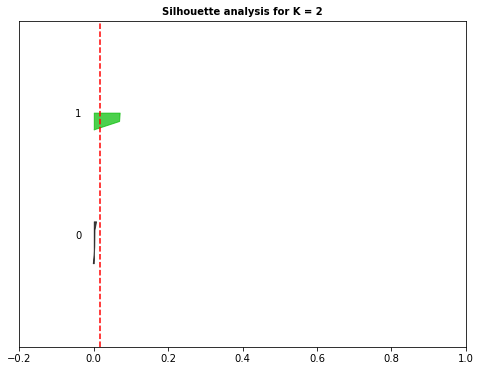

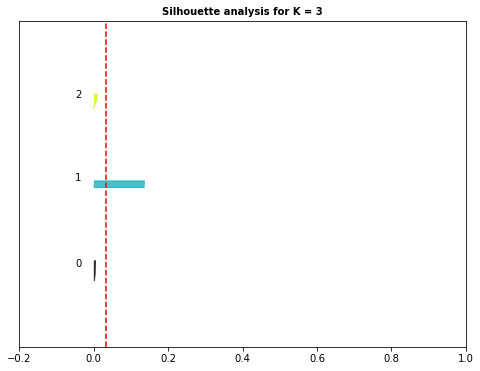

In [72]:
silhouette(kmeans_results, final_df, plot=True)

In [73]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

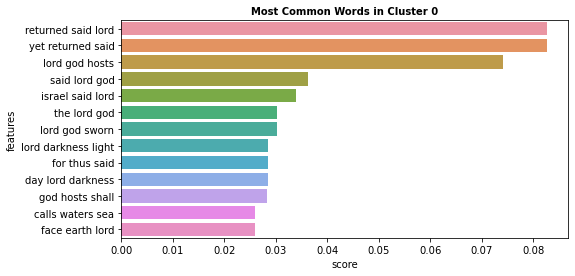

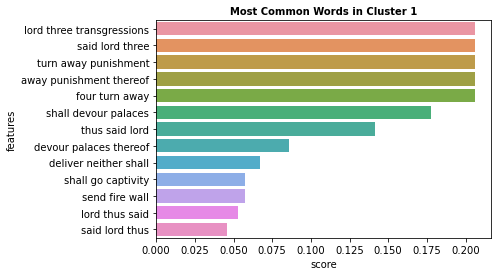

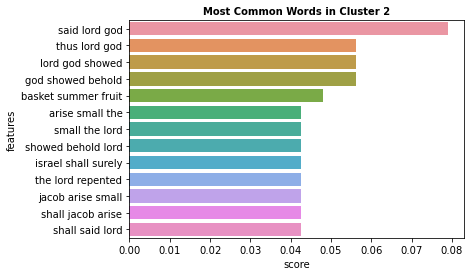

In [74]:
best_result = 3
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [75]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

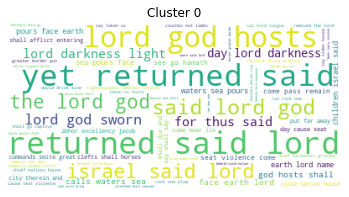

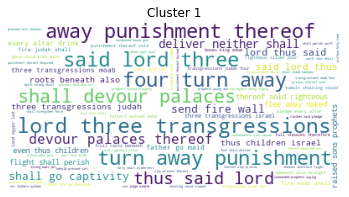

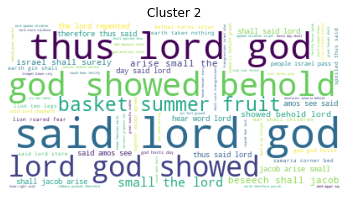

In [76]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [77]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Amos_1,"'words', 'amos', ',', 'among', 'herdsmen', 'te...",1
101,Amos_2,"'thus', 'said', 'lord', ';', 'three', 'transgr...",1
102,Amos_3,"'hear', 'word', 'lord', 'spoken', ',', 'childr...",2
103,Amos_4,"'hear', 'word', ',', 'cows', 'bashan', ',', 'm...",0
104,Amos_5,"'hear', 'word', 'take', ',', 'even', 'lamentat...",0


In [78]:
print(df)

      Autor                                              Livro  label
100  Amos_1  'words', 'amos', ',', 'among', 'herdsmen', 'te...      1
101  Amos_2  'thus', 'said', 'lord', ';', 'three', 'transgr...      1
102  Amos_3  'hear', 'word', 'lord', 'spoken', ',', 'childr...      2
103  Amos_4  'hear', 'word', ',', 'cows', 'bashan', ',', 'm...      0
104  Amos_5  'hear', 'word', 'take', ',', 'even', 'lamentat...      0
105  Amos_6  'woe', 'ease', 'zion', ',', 'trust', 'mountain...      0
106  Amos_7  'thus', 'lord', 'god', 'showed', ';', ',', 'be...      2
107  Amos_8  'thus', 'lord', 'god', 'showed', ':', 'behold'...      2
108  Amos_9  'saw', 'lord', 'standing', 'altar', ':', 'said...      0
